## Mnist data

In [1]:
import pandas as pd

df_train = pd.read_csv('./data/mnist_train.csv')
df_test = pd.read_csv('./data/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [2]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np

train_dt = np.array(df_train.iloc[:, 1:])
train_lb = np.array(df_train['label'])

test_dt = np.array(df_test.iloc[:, 1:])
test_lb = np.array(df_test['label'])

train_dt.shape, train_lb.shape, test_dt.shape, test_lb.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
import random
samples = random.choices(population=range(0,60000), k=16)
samples

[29114,
 40192,
 43785,
 58237,
 30633,
 56461,
 13204,
 35875,
 43354,
 44922,
 29406,
 59790,
 42545,
 12271,
 23474,
 28115]

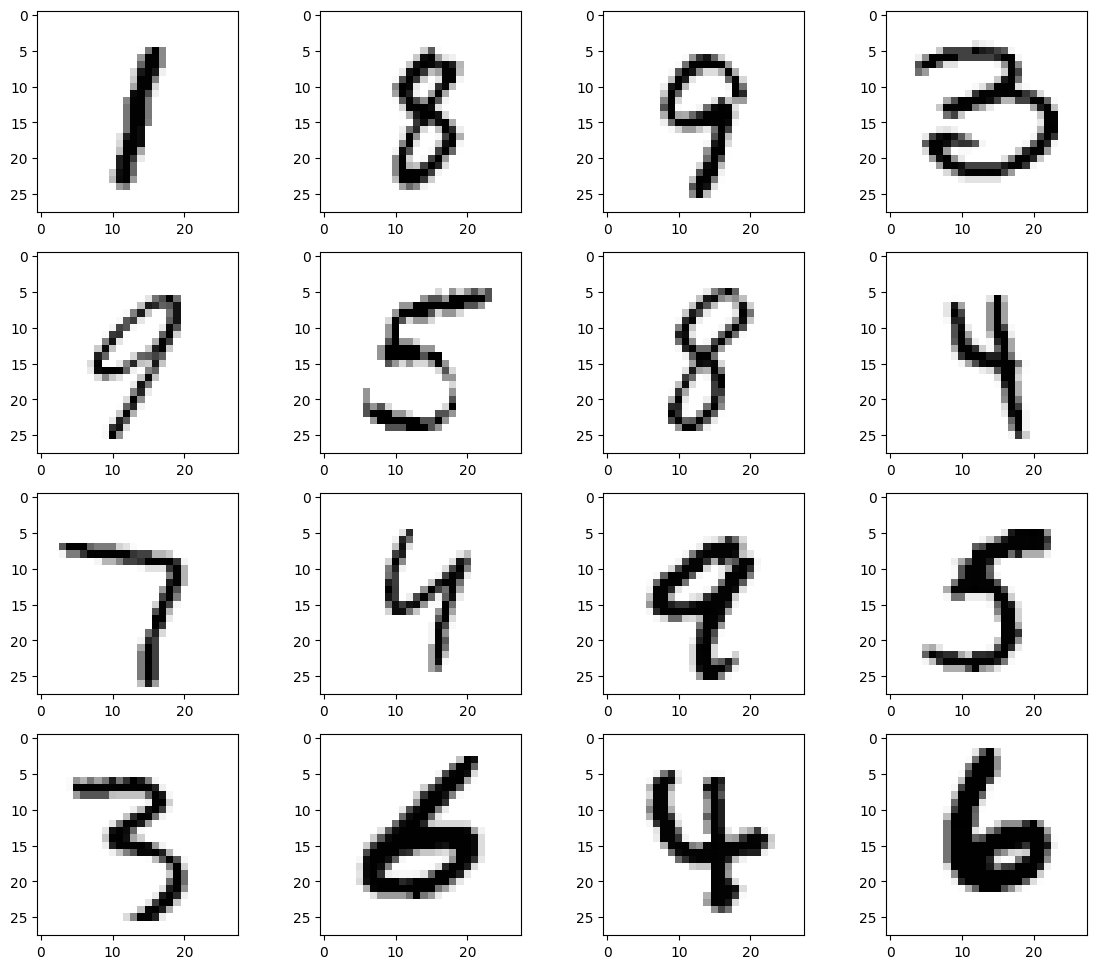

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(train_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.show()

### fit

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_dt, train_lb)

print('time : ', time.time()- start_time)

time :  0.45135998725891113


In [8]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(test_dt)

print('fit time : ', time.time()- start_time)
print(accuracy_score(test_lb, pred))

fit time :  29.216378450393677
0.9688


### pca로 차원의 저주 풀어주기

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])

parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
grid.fit(train_dt, train_lb)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [11]:
print("Best score : %0.3f" %grid.best_score_)
print('best param')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, ' , ', best_parameters[param_name])

Best score : 0.931
best param
clf__n_neighbors  ,  10
pca__n_components  ,  10


In [12]:
accuracy_score(test_lb, grid.best_estimator_.predict(test_dt))

0.9289

In [13]:
def results(y_pred, test_lb):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(test_lb, y_pred))

results(grid.predict(train_dt), train_lb)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



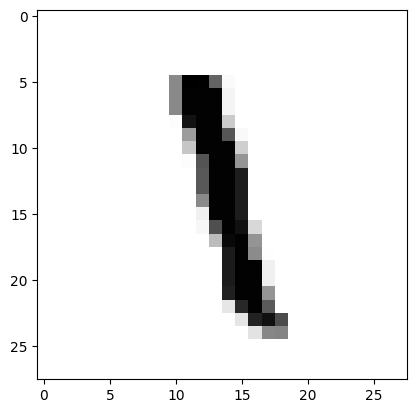

answer is :  [1]
readl label is :  1


In [14]:
n= 700
plt.imshow(test_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.show()

print('answer is : ', grid.best_estimator_.predict(test_dt[n].reshape(1,784)))
print('readl label is : ', test_lb[n])

### 틀린데이터 확인

In [15]:
preds = grid.best_estimator_.predict(test_dt)
preds

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
test_lb

array([7, 2, 1, ..., 4, 5, 6])

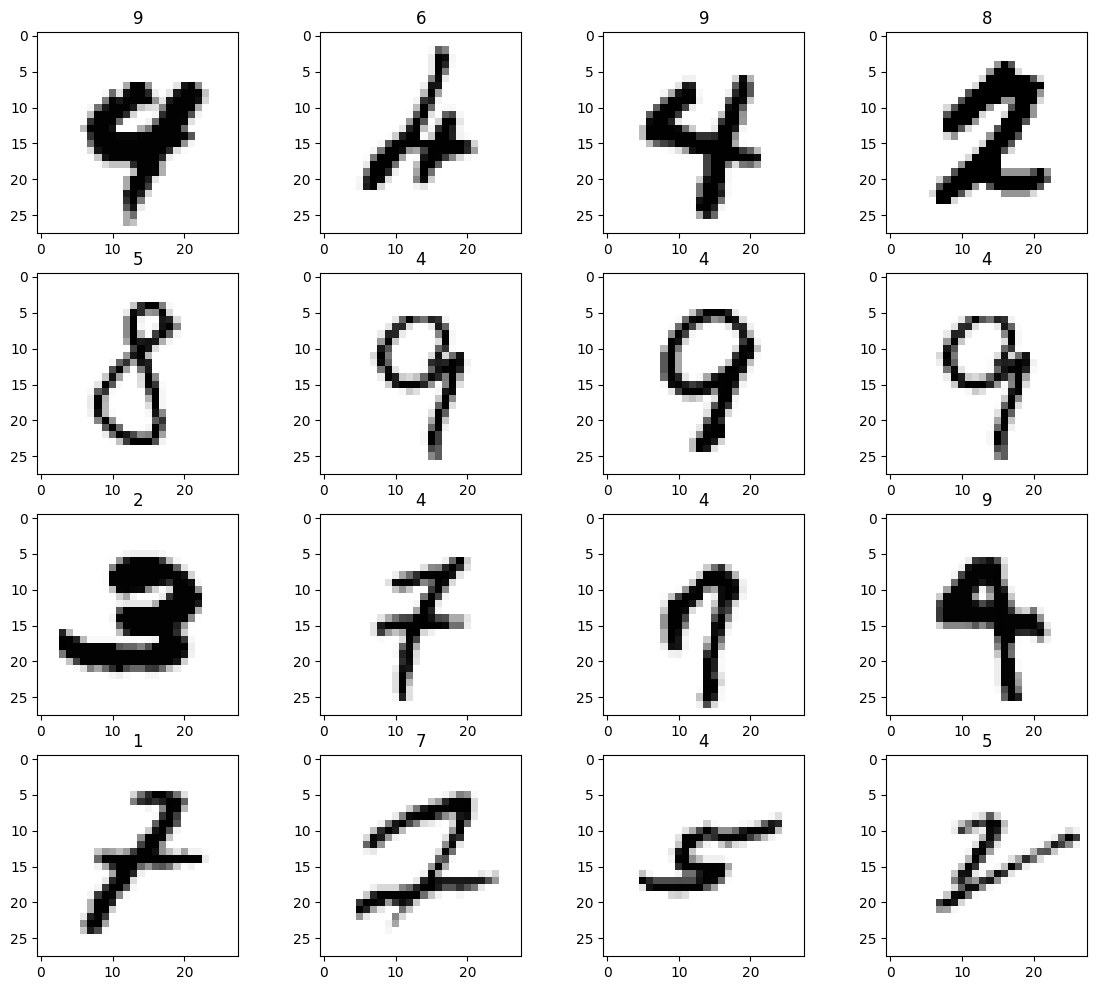

In [17]:
wrong_results = test_dt[test_lb != preds]
samples = random.choices(population=range(0, wrong_results.shape[0]), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys',
               interpolation='nearest')
    plt.title(grid.best_estimator_.predict(wrong_results[n].reshape(1,784))[0])

plt.show()